In [1]:
#import statement
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Identification of Sample Households

In [2]:
# reading file
df_1=pd.read_csv('IdentificationOfSampleHousehold.csv')
df_1.head()

,hh_id,state,region,district,response_code,multiplier
0,1101,14,141,1406,1,186.375
1,1102,14,141,1406,1,186.375
2,1103,14,141,1406,1,186.375
3,1104,14,141,1406,1,186.375
4,1201,14,141,1406,1,53.250


In [3]:
# info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100855 entries, 0 to 100854
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hh_id          100855 non-null  int64  
 1   state          100855 non-null  int64  
 2   region         100855 non-null  int64  
 3   district       100855 non-null  int64  
 4   response_code  100855 non-null  int64  
 5   multiplier     100855 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 4.6 MB


In [4]:
# number of unique variables
df_1.nunique()

hh_id            100855
state                35
region               87
district            612
response_code         5
multiplier        44696
dtype: int64

In [5]:
# unique values for state
df_1.state.unique()

array([14, 15, 17, 18, 13, 19, 16, 29, 32, 30, 28, 33, 31, 21, 20, 23, 24,
       22, 34, 35,  2,  3,  4,  5,  6,  1,  7, 27, 25, 26,  9,  8, 10, 11,
       12], dtype=int64)

In [6]:
# unique values for response code
df_1.response_code.unique()

array([1, 2, 9, 3, 4], dtype=int64)

In [7]:
# percentage of the types of response
df_1.groupby('response_code')['hh_id'].count()*100/df_1.shape[0]

response_code
1    78.967825
2    18.261861
3     1.832334
4     0.784294
9     0.153686
Name: hh_id, dtype: float64

In [8]:
df_1.multiplier.describe()

count    100855.000000
mean       2286.839300
std        3958.828359
min           0.695000
25%         308.230000
50%         928.445000
75%        2456.452500
max       99134.000000
Name: multiplier, dtype: float64

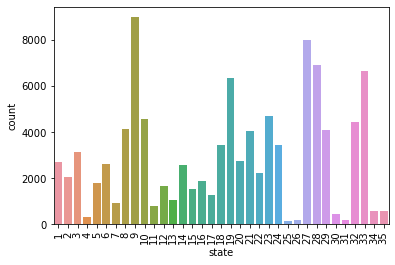

In [9]:
# number of households by state
sns.countplot(x="state", data=df_1)
plt.xticks(rotation=90);

#### Data understanding

- There are 100855 unique households that were surveyed
- 35 states, 87 regions and 612 districts were covered
- Response code indicates the cooperation of the informant.
        co-operative and capable -1, 
        co-operative but not capable -2,
        busy -3, 
        reluctant - 4, 
        others - 9
- Around 3% of the informats were busy, reluctant or others, ~18% responses were cooperative but not capable
- Multiplier indicates the weights to be used for each household when aggregating the results

#### Data Queries

- Do we map states and union territories here?
- Shall we keep only the responses with informant cooperative and capable for analysis?
- Use of multiplier depends on nss and nsc. What are they? Should these two columns be included too?

#### Data Cleaning

- Change the datatypes of hh_id, state, district and region to strings
- all hh_id should have 9 characters

### Household Characteristics

In [10]:
# read data
df_2=pd.read_csv('HouseholdCharacteristics.csv')
df_2.head()

C:\Users\Sushmitha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,hh_id,hh_size,nic_2004,nco_2004,hh_type,religion,social_group,cooking_code,lighting_code,dwelling_unit,salary_income,internet_access,mpce_urp,mpce_mrp
0,1101,3,50300,522,22,1,3,03,5,1,1.0,2.0,1535.67,1688.18
1,1102,1,NaN,NaN,29,1,3,03,5,1,2.0,2.0,2500.00,2599.47
2,1103,1,NaN,NaN,29,1,3,03,5,1,2.0,2.0,2655.00,2893.64
3,1104,4,75112,419,22,1,3,03,5,1,1.0,2.0,2109.00,2166.91
4,1201,6,75112,419,22,1,3,03,5,1,1.0,2.0,1007.83,1084.67


In [11]:
#info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100855 entries, 0 to 100854
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hh_id            100855 non-null  int64  
 1   hh_size          100855 non-null  int64  
 2   nic_2004         93775 non-null   object 
 3   nco_2004         93759 non-null   object 
 4   hh_type          100855 non-null  object 
 5   religion         100855 non-null  object 
 6   social_group     100855 non-null  object 
 7   cooking_code     100855 non-null  object 
 8   lighting_code    100855 non-null  object 
 9   dwelling_unit    100855 non-null  object 
 10  salary_income    100844 non-null  float64
 11  internet_access  100829 non-null  float64
 12  mpce_urp         100855 non-null  float64
 13  mpce_mrp         100855 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 10.8+ MB


In [12]:
df_2.describe()

,hh_id,hh_size,salary_income,internet_access,mpce_urp,mpce_mrp
count,1.008550e+05,100855.000000,100844.000000,100829.000000,100855.000000,100855.000000
mean,5.142972e+08,4.645789,1.723851,1.974353,1493.742007,1527.928448
std,3.982157e+08,2.338262,0.447094,0.158082,2711.417806,1525.071091
min,1.101000e+03,1.000000,1.000000,1.000000,2.500000,12.770000
25%,4.553125e+07,3.000000,1.000000,2.000000,741.500000,783.840000
50%,8.123311e+08,4.000000,2.000000,2.000000,1078.000000,1132.080000
75%,8.494417e+08,6.000000,2.000000,2.000000,1703.750000,1779.715000
max,8.999923e+08,35.000000,2.000000,2.000000,405618.500000,108545.480000


In [13]:
df_2.nic_2004.nunique()

1047

In [14]:
df_2.nco_2004.nunique()

147

In [15]:
df_2.nic_2004.unique()

array(['50300', nan, '75112', ..., '17212', '15132', '17243'],
      dtype=object)

In [16]:
df_2.nco_2004.unique()

array(['522', nan, '419', '523', '412', '733', '343', '832', '724', '916',
       'X99', '516', '913', '620', '342', '214', '723', '931', '932',
       '713', '612', '611', '743', '232', '231', '331', '826', '741',
       '241', '833', '513', '915', '223', '933', '512', '911', '245',
       '345', '112', '121', '321', '13x', '122', '514', '311', '614',
       '344', '714', '823', '334', '221', '615', '822', '920', '912',
       '323', '322', '411', '313', '742', '242', '829', '341', '233',
       '712', '744', '421', '111', '222', '711', '914', '246', '332',
       '347', '243', '721', '213', '414', '312', 'X10', '01x', '731',
       '722', '211', '413', '511', '37x', '515', '422', '814', '827',
       '815', '114', '212', '831', '824', '333', '825', '130', '21x',
       '834', '123', '821', '812', '813', '244', '732', '734', '314',
       '828', '816', '51x', '93x', '315', '19x', '346', '348', '613',
       '811', '324', '41x', '817', '92x', '63x', '95x', '113', '61x',
       '15x', '

In [17]:
df_2.hh_type.unique()

array(['22', '29', '21', '23', '2N', '19', '13', '11', '14', '12', '1N'],
      dtype=object)

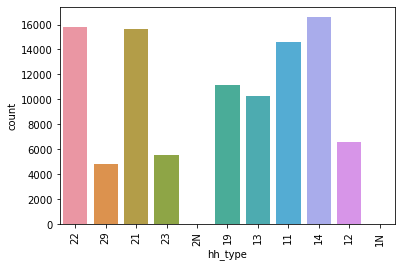

In [18]:
# number of households by hh_type
sns.countplot(x="hh_type", data=df_2)
plt.xticks(rotation=90);

In [19]:
df_2.religion.unique()

array(['1', '9', '3', '2', '6', '4', 'N', '5', '7', 1, 2, 5, 9, 3, 6, 4],
      dtype=object)

In [20]:
df_2.social_group.unique()

array(['3', '1', '9', '2', 'N'], dtype=object)

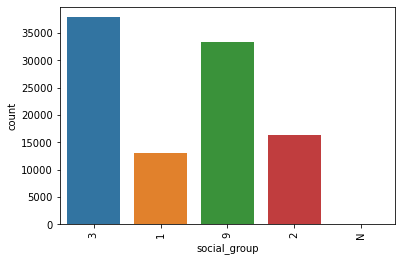

In [21]:
# number of households by social group
sns.countplot(x="social_group", data=df_2)
plt.xticks(rotation=90);

In [22]:
df_2.cooking_code.unique()

array(['03', '01', '02', '07', '06', '08', '10', 'NN', '04', '09', '05',
       '2', '3', '1', '9', '7', '4', '5', '8', '6'], dtype=object)

In [23]:
df_2.lighting_code.unique()

array(['5', '4', '1', 'N', '6', '9', '3', '2'], dtype=object)

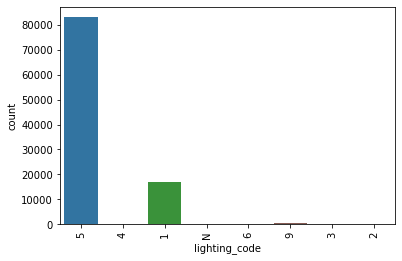

In [24]:
# number of households by lighting code
sns.countplot(x="lighting_code", data=df_2)
plt.xticks(rotation=90);

In [25]:
df_2.dwelling_unit.unique()

array(['1', '2', 'N', '9', '3'], dtype=object)

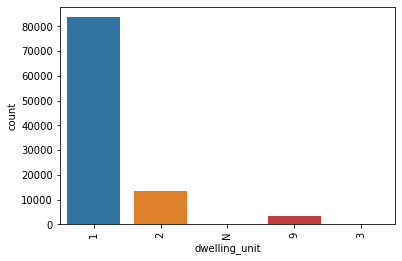

In [26]:
# number of households by dwelling unit
sns.countplot(x="dwelling_unit", data=df_2)
plt.xticks(rotation=90);

In [27]:
df_2.salary_income.unique()

array([ 1.,  2., nan])

In [28]:
# ratio of households in each category
df_2.salary_income.value_counts(normalize=True, dropna=False)

2.0    0.723772
1.0    0.276119
NaN    0.000109
Name: salary_income, dtype: float64

In [29]:
df_2.internet_access.unique()

array([ 2.,  1., nan])

In [30]:
# ratio of households in each category
df_2.internet_access.value_counts(normalize=True, dropna=False)

2.0    0.974101
1.0    0.025641
NaN    0.000258
Name: internet_access, dtype: float64

In [31]:
df_2.mpce_urp.describe()

count    100855.000000
mean       1493.742007
std        2711.417806
min           2.500000
25%         741.500000
50%        1078.000000
75%        1703.750000
max      405618.500000
Name: mpce_urp, dtype: float64

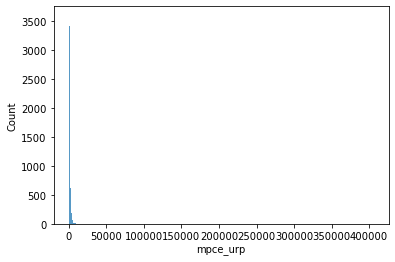

In [32]:
# distribution of mpce_urp
sns.histplot(data=df_2, x="mpce_urp");

In [33]:
df_2.mpce_mrp.describe()

count    100855.000000
mean       1527.928448
std        1525.071091
min          12.770000
25%         783.840000
50%        1132.080000
75%        1779.715000
max      108545.480000
Name: mpce_mrp, dtype: float64

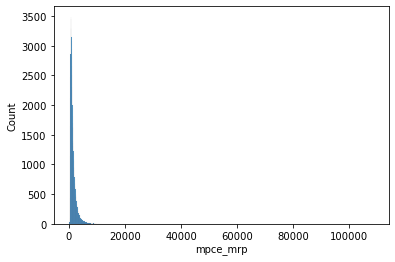

In [34]:
# distribution of mpce_mrp
sns.histplot(data=df_2, x="mpce_mrp");

#### Data Understanding
- Each row is representative of one household surveyed. There are 100855 households
- hh_size includes temporary stay aways but excludes temporary visitors. Min: 1, Max: 35
- hh_type indicates the household type based on the livelihood
- cooking_code indicates the primary source of energy used for cooking
- lighting_code indicates the primary source of energy used for lighting. Majority use electricity (5) followed by kerosene (1)
- dwelling_unit describes accommodation availed of by a household for its residential purpose. Majority are owned
- salary_income: Any member of the household earn  regular salary ? 1-yes, 2-no. 11 rows have null values, 72.38% have atleast one member earning regular salary
- internet_access: Household has access to internet at home on the date of survey 1-yes, 2-no. 24 rows have null values, 97.4% have no internet access
- mpce_urp: monthly per capita expenditure using uniform reference period. Highly skewed to the left

*Uniform Reference Period MPCE (or MPCEURP): This is the measure of MPCE obtained by the NSS consumer expenditure survey (CES) when household consumer expenditure on each item is recorded for a reference period of “last 30 days” (preceding the date of survey)*
- mpce_mrp: monthly per capita expenditure using mixed reference period. Skewed to left

*Mixed Reference Period MPCE measures consumption of five low-frequency items (clothing, footwear, durables, education and  institutional health expenditure) over the previous year, and all other items over the previous 30 days.*

#### Data queries
- What is meant by principal industry of household? (nic_2004)
- Some nco_2004 categories don't have any description. How to interpret them? What does null indicate?
- What does N indicate in hh_type, religion?
- Shall we map the categories here?

#### Data cleaning
- change hh_id to string datatype. Each string should have 9 characters
- In religion some categories are repeated some take as strings others numbers. Convert all to string
- In cooking_code some categories are repeated due to leading zeros. Convert all to have two characters
- Convert salary_income and internet access to boolean

### Demographics

In [35]:
#read data
df_3=pd.read_csv('Demographics.csv')
df_3.head()

C:\Users\Sushmitha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,hh_id,person_serial_no,relation,sex,age,marital_status,education,days_stayed_away,meals_per_day,meals_school,meals_employer,meals_others,meals_payment,meals_home
0,1101,1,1,1,36.0,2,08,0.0,2.0,0.0,0.0,0.0,0.0,60.0
1,1101,2,2,2,32.0,2,12,0.0,2.0,0.0,0.0,0.0,0.0,60.0
2,1101,3,5,2,0.0,1,01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1102,1,1,1,21.0,1,10,2.0,2.0,0.0,0.0,4.0,0.0,56.0
4,1103,1,1,1,20.0,1,10,0.0,2.0,0.0,0.0,2.0,0.0,58.0


In [36]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468551 entries, 0 to 468550
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hh_id             468551 non-null  int64  
 1   person_serial_no  468551 non-null  int64  
 2   relation          468551 non-null  int64  
 3   sex               468551 non-null  int64  
 4   age               468550 non-null  float64
 5   marital_status    468551 non-null  object 
 6   education         468551 non-null  object 
 7   days_stayed_away  179929 non-null  float64
 8   meals_per_day     468481 non-null  float64
 9   meals_school      138457 non-null  float64
 10  meals_employer    117606 non-null  float64
 11  meals_others      146192 non-null  float64
 12  meals_payment     128067 non-null  float64
 13  meals_home        466869 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 50.0+ MB


In [37]:
df_3.describe()

,hh_id,person_serial_no,relation,sex,age,days_stayed_away,meals_per_day,meals_school,meals_employer,meals_others,meals_payment,meals_home
count,4.685510e+05,468551.000000,468551.000000,468551.000000,468550.000000,179929.000000,468481.000000,138457.000000,117606.000000,146192.000000,128067.000000,466869.000000
mean,5.358409e+08,3.411321,3.707210,1.485057,28.168772,0.910198,2.449280,4.223030,0.407080,2.493693,1.679035,71.016326
std,3.930665e+08,2.329007,2.031355,0.499777,19.002329,3.155464,0.565077,8.422282,4.354444,7.908413,8.204721,17.363391
min,1.101000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.936110e+07,2.000000,2.000000,1.000000,13.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,8.141311e+08,3.000000,5.000000,1.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,8.503422e+08,5.000000,5.000000,2.000000,41.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,90.000000
max,8.999923e+08,35.000000,9.000000,2.000000,120.000000,30.000000,3.000000,90.000000,90.000000,90.000000,90.000000,90.000000


In [38]:
df_3.relation.unique()

array([1, 2, 5, 3, 4, 6, 7, 8, 9], dtype=int64)

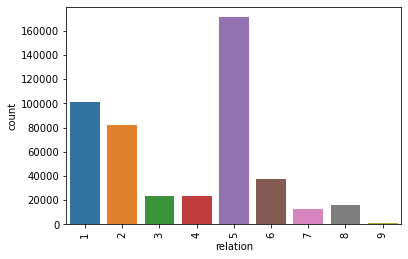

In [39]:
# count of people by their relation to head
sns.countplot(x="relation", data=df_3)
plt.xticks(rotation=90);

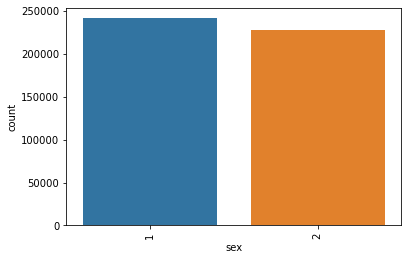

In [40]:
# count of people by sex
sns.countplot(x="sex", data=df_3)
plt.xticks(rotation=90);

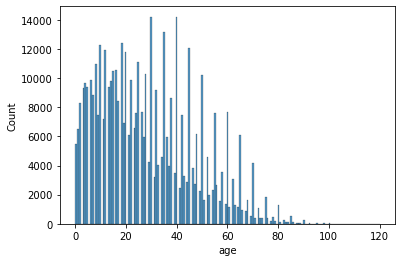

In [41]:
# distribution of age
sns.histplot(data=df_3, x="age");

In [42]:
df_3.marital_status.unique()

array(['2', '1', '3', '4', 'N', 1, 2, 3, 4], dtype=object)

In [43]:
df_3.education.unique()

array(['08', '12', '01', '10', '06', '05', '07', '13', '11', '04', 'NN',
       '03', '02', '7', '5', '6', '1', '8', '2', '4', '3', 6, 1, 7, 13, 5,
       12, 8, 10, 4, 11, 3, 2], dtype=object)

In [44]:
df_3.isna().sum()/df_3.shape[0]

hh_id               0.000000
person_serial_no    0.000000
relation            0.000000
sex                 0.000000
age                 0.000002
marital_status      0.000000
education           0.000000
days_stayed_away    0.615988
meals_per_day       0.000149
meals_school        0.704500
meals_employer      0.749001
meals_others        0.687991
meals_payment       0.726674
meals_home          0.003590
dtype: float64

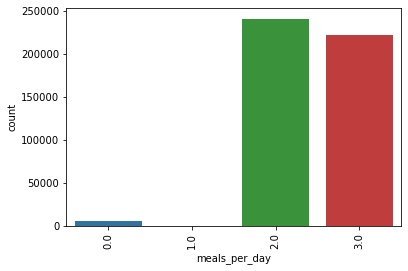

In [45]:
# count of people by meals per day
sns.countplot(x="meals_per_day", data=df_3)
plt.xticks(rotation=90);

In [46]:
# ratios in each category
#df_3.meals_school.value_counts(normalize=True, dropna=False)

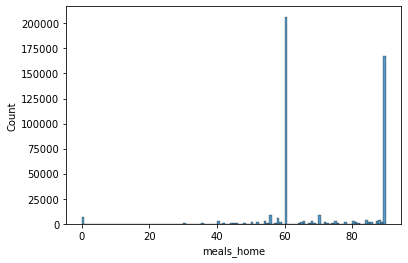

In [47]:
# distribution of meals_home
sns.histplot(data=df_3, x="meals_home");

#### Data understanding
- Each row indicates a person in a household
- person_serial_no assigns consecutive numbers for members of same household
- relation indicates how the person is related to head of household
- Sex 1: Male 2: Female. Almost equal representation
- Age ranges from 0 to 120
- days_stayed_away: number of days stayed away from home during last 30 days; 61% empty
- meals_per_day: number of meals usually taken in a day. Majority have 2 meals per day followed by 3

#### Data queries
- For different meals column, does the value indicate number of meals taken in that category in last 30days?
- How to interpret null values for days_stayed_away, meals_per_day, meals_school, meals_employer, meals_other, meals_payment, meals_home?
- Shall we map the categories here?

#### Data cleaning
- change hh_id to string datatype. Each string should have 9 characters
- change relation, sex to category type
- Marital status, Education have categories repeated twice. Convert all to strings

### Expenditure on Miscellaneous Goods

In [48]:
#read data
df_4=pd.read_csv('ExpenditureOnMiscellaneousGoods.csv')
df_4.head()

,hh_id,item_code,value
0,1101,437,300
1,1101,439,300
2,1101,441,100
3,1101,449,100
4,1101,450,40


In [49]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163878 entries, 0 to 2163877
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   hh_id      int64
 1   item_code  int64
 2   value      int64
dtypes: int64(3)
memory usage: 49.5 MB


In [50]:
# finding number of null values
df_4.isnull().sum()

hh_id        0
item_code    0
value        0
dtype: int64

In [51]:
df_4.item_code.unique()

array([437, 439, 441, 449, 450, 451, 452, 453, 454, 455, 457, 459, 461,
       467, 468, 470, 472, 479, 483, 486, 488, 491, 496, 499, 503, 505,
       508, 511, 519, 522, 529, 539, 540, 541, 549, 435, 465, 484, 502,
       520, 430, 442, 490, 423, 429, 432, 443, 460, 463, 466, 495, 512,
       420, 471, 507, 493, 462, 513, 438, 444, 445, 421, 424, 422, 440,
       456, 431, 464, 487, 473, 510, 485, 436, 480, 492, 494, 434, 521,
       482, 504, 523, 506, 433, 481, 501, 500], dtype=int64)

In [52]:
df_4.value.describe()

count    2.163878e+06
mean     1.660395e+02
std      5.441549e+02
min      0.000000e+00
25%      2.000000e+01
50%      5.000000e+01
75%      1.450000e+02
max      9.050000e+04
Name: value, dtype: float64

#### Data Understanding
- Each row indicates expenditure on one category of miscellaneous goods
- There are no null values

#### Data Cleaning
- Convert from long format to wide format and subset only required columns **DONE**
- Replace na with 0 **DONE**
- change hh_id to string datatype. Each string should have 9 characters

In [53]:
# convert from wide to long format
df_4_wide=df_4.pivot(index='hh_id', columns='item_code', values='value').reset_index()
df_4_wide

item_code,hh_id,420,421,422,423,424,429,430,431,432,...,519,520,521,522,523,529,539,540,541,549
0,1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,485.0,NaN,NaN,3.0,NaN,3.0,4000.0,75.0,11.0,86.0
1,1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,500.0,NaN,NaN,NaN,500.0,500.0,NaN,NaN,NaN
2,1103,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,30.0,500.0,NaN,NaN,NaN,500.0,500.0,NaN,NaN,NaN
3,1104,NaN,NaN,NaN,10.0,NaN,10.0,NaN,NaN,150.0,...,1050.0,NaN,NaN,3.0,NaN,3.0,4500.0,75.0,11.0,86.0
4,1201,25.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,...,835.0,NaN,NaN,3.0,NaN,3.0,5000.0,75.0,11.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100821,899991301,280.0,NaN,50.0,NaN,NaN,330.0,NaN,NaN,NaN,...,410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0
100822,899992101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,240.0
100823,899992201,180.0,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,...,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0
100824,899992202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0


In [54]:
# subset required columns
df_4_wide_subset=df_4_wide[['hh_id',500,501,502,503,504,505,508,510,511,512,519]]
df_4_wide_subset.columns=['hh_id','air','rail','bus','taxi','steamer',
                          'rickshaw','petrol','diesel','lubrication','school_bus','conveyance_subtotal']
df_4_wide_subset.head()

,hh_id,air,rail,bus,taxi,steamer,rickshaw,petrol,diesel,lubrication,school_bus,conveyance_subtotal
0,1101,NaN,NaN,NaN,20.0,NaN,15.0,400.0,NaN,50.0,NaN,485.0
1,1102,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
2,1103,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0
3,1104,NaN,NaN,NaN,NaN,NaN,NaN,400.0,NaN,50.0,600.0,1050.0
4,1201,NaN,NaN,40.0,30.0,NaN,15.0,300.0,NaN,30.0,400.0,835.0


In [55]:
#replace na with 0
df_4_wide_subset.fillna(0, inplace=True)
df_4_wide_subset.head()

C:\Users\Sushmitha\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,hh_id,air,rail,bus,taxi,steamer,rickshaw,petrol,diesel,lubrication,school_bus,conveyance_subtotal
0,1101,0.0,0.0,0.0,20.0,0.0,15.0,400.0,0.0,50.0,0.0,485.0
1,1102,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
2,1103,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
3,1104,0.0,0.0,0.0,0.0,0.0,0.0,400.0,0.0,50.0,600.0,1050.0
4,1201,0.0,0.0,40.0,30.0,0.0,15.0,300.0,0.0,30.0,400.0,835.0


In [56]:
#info
df_4_wide_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100826 entries, 0 to 100825
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hh_id                100826 non-null  int64  
 1   air                  100826 non-null  float64
 2   rail                 100826 non-null  float64
 3   bus                  100826 non-null  float64
 4   taxi                 100826 non-null  float64
 5   steamer              100826 non-null  float64
 6   rickshaw             100826 non-null  float64
 7   petrol               100826 non-null  float64
 8   diesel               100826 non-null  float64
 9   lubrication          100826 non-null  float64
 10  school_bus           100826 non-null  float64
 11  conveyance_subtotal  100826 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.2 MB


In [60]:
df_4_wide_subset.describe()

,hh_id,air,rail,bus,taxi,steamer,rickshaw,petrol,diesel,lubrication,school_bus,conveyance_subtotal
count,1.008260e+05,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000,100826.000000
mean,5.142423e+08,5.012864,10.354512,88.180896,35.516494,0.663281,4.146639,158.930901,11.781554,5.472219,17.638288,342.960556
std,3.982306e+08,430.200516,120.269953,193.440761,148.501662,27.027410,22.472833,412.728418,164.378884,43.537526,141.709936,788.624556
min,1.101000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.552111e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,8.123267e+08,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000
75%,8.494413e+08,0.000000,0.000000,100.000000,30.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,400.000000
max,8.999923e+08,80000.000000,11700.000000,15000.000000,15000.000000,4800.000000,1550.000000,30000.000000,17535.000000,4800.000000,12000.000000,90500.000000


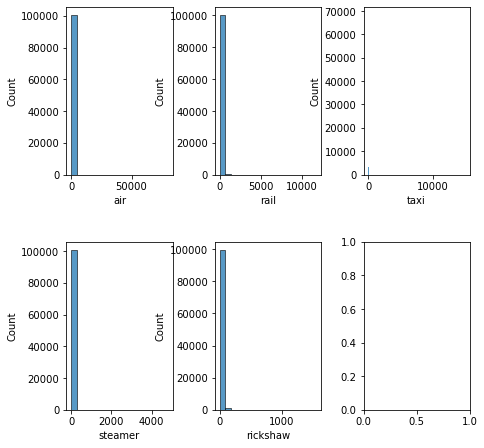

In [70]:
# plotting histograms for expenditure on each item
fig, axs = plt.subplots(2, 3, figsize=(7,7))

sns.histplot(data=df_4_wide_subset, x="air", ax=axs[0, 0])
sns.histplot(data=df_4_wide_subset, x="rail", ax=axs[0, 1])
sns.histplot(data=df_4_wide_subset, x="taxi", ax=axs[0, 2])
sns.histplot(data=df_4_wide_subset, x="steamer", ax=axs[1, 0])
sns.histplot(data=df_4_wide_subset, x="rickshaw", ax=axs[1, 1]);

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

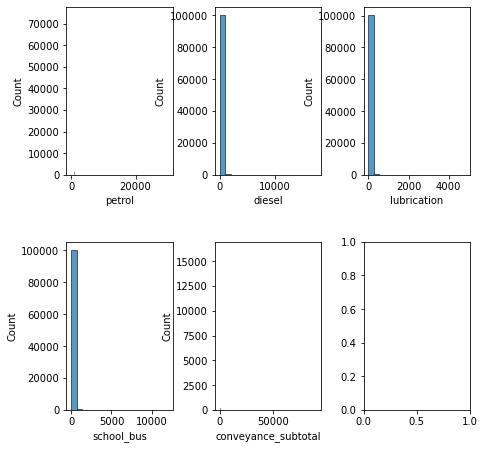

In [71]:
# plotting histograms for expenditure on each item
fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=df_4_wide_subset, x="petrol", ax=axs[0, 0])
sns.histplot(data=df_4_wide_subset, x="diesel", ax=axs[0, 1])
sns.histplot(data=df_4_wide_subset, x="lubrication", ax=axs[0, 2])
sns.histplot(data=df_4_wide_subset, x="school_bus", ax=axs[1, 0])
sns.histplot(data=df_4_wide_subset, x="conveyance_subtotal", ax=axs[1, 1])


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

In [57]:
df_4_wide_subset.to_csv('ExpenditureOnMiscelleneousGoods-Wide.csv', index=False)

#### Data Understanding

- Not all households are present in this data
- Expenditures are skewed to the left. Have to plot on log scale for better understanding

### Expenditure For Purchase And Construction

In [72]:
#read data
df_5=pd.read_csv('ExpenditureForPurchaseAndConstruction.csv')
df_5.head()

,hh_id,item_code,whether_possess,first_hand_purchase_no_30days,whether_hire_purchased_30days,first_hand_purchase_value_30days,cost_raw_material_repair_30days,sec_hand_purchase_value_30days,total_expenditure_30days,first_hand_purchase_no_365days,whether_hire_purchased_365days,first_hand_purchase_value_365days,cost_raw_material_repair_365days,sec_hand_purchase_no_365days,sec_hand_purchase_value_365days,total_expenditure_365days
0,1101,550,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1101,551,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1101,552,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1101,560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1101,561,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070178 entries, 0 to 3070177
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   hh_id                              int64  
 1   item_code                          int64  
 2   whether_possess                    float64
 3   first_hand_purchase_no_30days      float64
 4   whether_hire_purchased_30days      float64
 5   first_hand_purchase_value_30days   float64
 6   cost_raw_material_repair_30days    float64
 7   sec_hand_purchase_value_30days     float64
 8   total_expenditure_30days           float64
 9   first_hand_purchase_no_365days     float64
 10  whether_hire_purchased_365days     float64
 11  first_hand_purchase_value_365days  float64
 12  cost_raw_material_repair_365days   float64
 13  sec_hand_purchase_no_365days       float64
 14  sec_hand_purchase_value_365days    float64
 15  total_expenditure_365days          float64
dtypes: float64(14), in

In [75]:
#finding null values
df_5.isnull().sum()

hh_id                                      0
item_code                                  0
whether_possess                       363452
first_hand_purchase_no_30days        3064768
whether_hire_purchased_30days        3037361
first_hand_purchase_value_30days     2912264
cost_raw_material_repair_30days      2900914
sec_hand_purchase_value_30days       2960066
total_expenditure_30days             2855430
first_hand_purchase_no_365days       3038548
whether_hire_purchased_365days       2940990
first_hand_purchase_value_365days    2726313
cost_raw_material_repair_365days     2673683
sec_hand_purchase_no_365days         3068465
sec_hand_purchase_value_365days      2956424
total_expenditure_365days            2464287
dtype: int64

In [76]:
df_5.whether_possess.unique()

array([ 1.,  2., nan,  5.,  6.,  3.,  4.,  7.,  9.,  0.])

In [85]:
df_5.whether_hire_purchased_30days.unique()

array([nan,  2.,  1.])

In [86]:
df_5.whether_hire_purchased_365days.unique()

array([nan,  2.,  1.,  3.,  5.,  0.,  8.,  7.,  4.,  9.])

#### Data Understanding
- Each row indicates expenditure for purchase and construction of different categories

#### Data Queries
- Whether possessed and whether_hire_purchased_365days should be boolean according to variable description. They have values from 1 to 9. Does it indicate number possessed?
- How to interpret nan? Can take 0 for value type questions, but what about null values in boolean questions (Whether_possessed, whether_hire_purchased_30days and whether_hire_purchased_365days

#### Data Cleaning
- change hh_id to string datatype. Each string should have 9 characters
- Filter only codes for transport modes and convert to long format DONE

In [87]:
# filter only for transport modes
df_5_filter=df_5[df_5.item_code.isin([600,601, 602])].reset_index().drop('index', axis=1)
df_5_filter.head()

,hh_id,item_code,whether_possess,first_hand_purchase_no_30days,whether_hire_purchased_30days,first_hand_purchase_value_30days,cost_raw_material_repair_30days,sec_hand_purchase_value_30days,total_expenditure_30days,first_hand_purchase_no_365days,whether_hire_purchased_365days,first_hand_purchase_value_365days,cost_raw_material_repair_365days,sec_hand_purchase_no_365days,sec_hand_purchase_value_365days,total_expenditure_365days
0,1101,600,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1101,601,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,300.0
2,1101,602,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1102,600,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,50.0
4,1102,601,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_5_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280757 entries, 0 to 280756
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   hh_id                              280757 non-null  int64  
 1   item_code                          280757 non-null  int64  
 2   whether_possess                    280686 non-null  float64
 3   first_hand_purchase_no_30days      316 non-null     float64
 4   whether_hire_purchased_30days      837 non-null     float64
 5   first_hand_purchase_value_30days   245 non-null     float64
 6   cost_raw_material_repair_30days    19752 non-null   float64
 7   sec_hand_purchase_value_30days     89 non-null      float64
 8   total_expenditure_30days           20048 non-null   float64
 9   first_hand_purchase_no_365days     1477 non-null    float64
 10  whether_hire_purchased_365days     2242 non-null    float64
 11  first_hand_purchase_value_365days  1521

In [92]:
#mapping item code with item_name
df_5_filter['item']=df_5_filter.item_code.map({600: 'bicycle', 601: 'motorcycle',602:'motorcar'})
df_5_filter.head()

,hh_id,item_code,whether_possess,first_hand_purchase_no_30days,whether_hire_purchased_30days,first_hand_purchase_value_30days,cost_raw_material_repair_30days,sec_hand_purchase_value_30days,total_expenditure_30days,first_hand_purchase_no_365days,whether_hire_purchased_365days,first_hand_purchase_value_365days,cost_raw_material_repair_365days,sec_hand_purchase_no_365days,sec_hand_purchase_value_365days,total_expenditure_365days,item
0,1101,600,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bicycle
1,1101,601,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,300.0,motorcycle
2,1101,602,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,motorcar
3,1102,600,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,50.0,bicycle
4,1102,601,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,motorcycle


In [93]:
df_5_filter.columns

Index(['hh_id', 'item_code', 'whether_possess',
       'first_hand_purchase_no_30days', 'whether_hire_purchased_30days',
       'first_hand_purchase_value_30days', 'cost_raw_material_repair_30days',
       'sec_hand_purchase_value_30days', 'total_expenditure_30days',
       'first_hand_purchase_no_365days', 'whether_hire_purchased_365days',
       'first_hand_purchase_value_365days', 'cost_raw_material_repair_365days',
       'sec_hand_purchase_no_365days', 'sec_hand_purchase_value_365days',
       'total_expenditure_365days', 'item'],
      dtype='object')

In [96]:
# convert from wide to long format
df_5_wide=df_5_filter.pivot(index='hh_id', columns='item', values=['whether_possess',
       'first_hand_purchase_no_30days', 'whether_hire_purchased_30days',
       'first_hand_purchase_value_30days', 'cost_raw_material_repair_30days',
       'sec_hand_purchase_value_30days', 'total_expenditure_30days',
       'first_hand_purchase_no_365days', 'whether_hire_purchased_365days',
       'first_hand_purchase_value_365days', 'cost_raw_material_repair_365days',
       'sec_hand_purchase_no_365days', 'sec_hand_purchase_value_365days',
       'total_expenditure_365days']).reset_index()
df_5_wide.columns = ['_'.join(tup).rstrip('_') for tup in df_5_wide.columns.values] #to convert from multilevel to single level
df_5_wide

,hh_id,whether_possess_bicycle,whether_possess_motorcar,whether_possess_motorcycle,first_hand_purchase_no_30days_bicycle,first_hand_purchase_no_30days_motorcar,first_hand_purchase_no_30days_motorcycle,whether_hire_purchased_30days_bicycle,whether_hire_purchased_30days_motorcar,whether_hire_purchased_30days_motorcycle,...,cost_raw_material_repair_365days_motorcycle,sec_hand_purchase_no_365days_bicycle,sec_hand_purchase_no_365days_motorcar,sec_hand_purchase_no_365days_motorcycle,sec_hand_purchase_value_365days_bicycle,sec_hand_purchase_value_365days_motorcar,sec_hand_purchase_value_365days_motorcycle,total_expenditure_365days_bicycle,total_expenditure_365days_motorcar,total_expenditure_365days_motorcycle
0,1101,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
1,1102,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN
2,1103,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1104,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
4,1201,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,200.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96928,899991301,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96929,899992101,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2250.0,600.0
96930,899992201,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96931,899992202,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
